In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install torch torchvision torchaudio
!pip install yolov5  # If using YOLOv5 to run inference
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.1/874.1 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 7.8 MB/s eta 0:00:00
   


image 1/1 /content/Screenshot 2024-09-14 081223.png: 576x640 5 colonys, 1 sharpie, 2 unlocks, 33.8ms
Speed: 3.4ms preprocess, 33.8ms inference, 881.1ms postprocess per image at shape (1, 3, 576, 640)


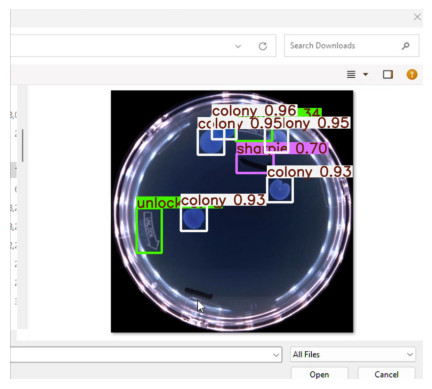

In [6]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2
import torch
from ultralytics import YOLO
import time


# Load the model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/Bacterial_Colony_Counter/detect/train4/weights/best.pt')

# Perform inference
results = model('/content/Screenshot 2024-09-14 081223.png')

# Get the first result (assuming you only have one image)
result_image = results[0].plot()  # This renders the image with bounding boxes

# Display the image using matplotlib
plt.imshow(result_image)
plt.axis('off')  # Hide axis
plt.show()


Saving Screenshot 2024-09-14 081211.png to Screenshot 2024-09-14 081211 (1).png
Saving Screenshot 2024-09-14 081223.png to Screenshot 2024-09-14 081223 (2).png
Saving Screenshot 2024-09-25 201857.png to Screenshot 2024-09-25 201857 (1).png
Uploaded file: Screenshot 2024-09-14 081211 (1).png

image 1/1 /content/Screenshot 2024-09-14 081211 (1).png: 448x640 5 colonys, 1 sharpie, 1 unlock, 6.8ms
Speed: 2.8ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


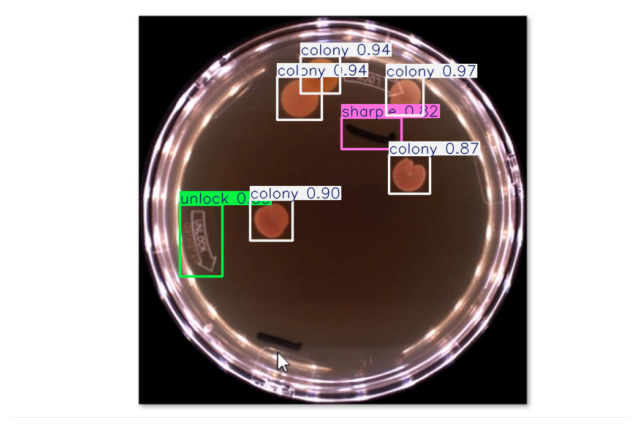

Uploaded file: Screenshot 2024-09-14 081223 (2).png

image 1/1 /content/Screenshot 2024-09-14 081223 (2).png: 576x640 5 colonys, 1 sharpie, 2 unlocks, 11.4ms
Speed: 3.9ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 640)


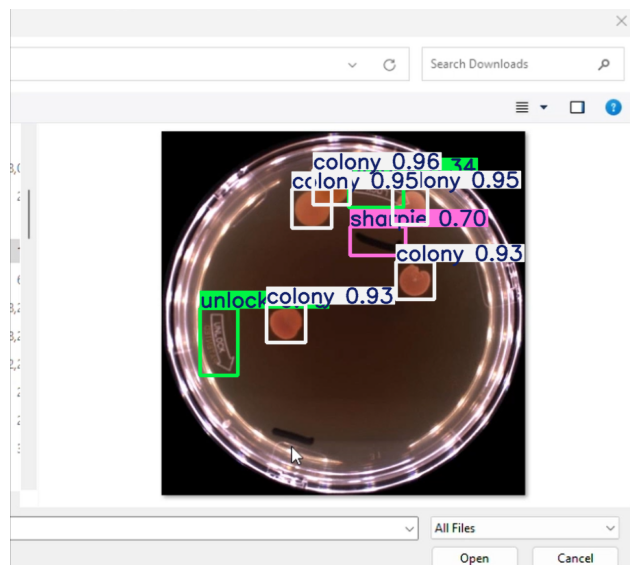

Uploaded file: Screenshot 2024-09-25 201857 (1).png

image 1/1 /content/Screenshot 2024-09-25 201857 (1).png: 640x640 5 colonys, 1 sharpie, 1 unlock, 13.7ms
Speed: 3.7ms preprocess, 13.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


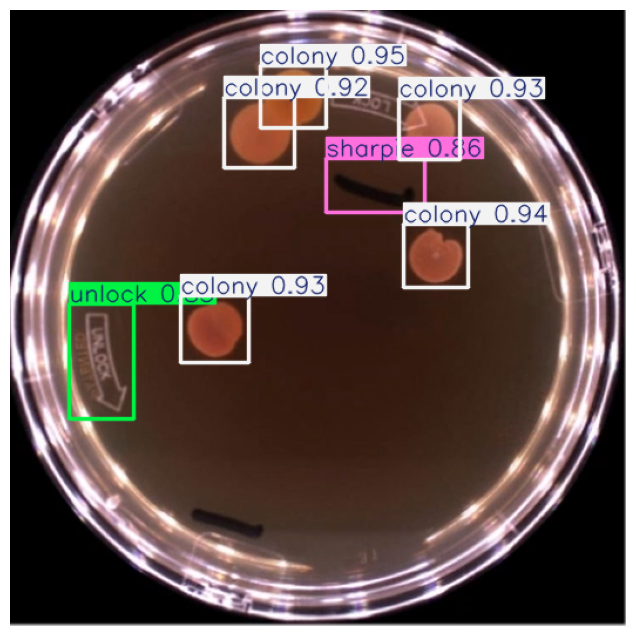

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Detection results saved to detection_results.csv and ready for download.


In [8]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2
from google.colab import files  # For file upload in Colab
import pandas as pd  # For creating the spreadsheet
import time  # For timestamp

# Load the model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/Bacterial_Colony_Counter/detect/train4/weights/best.pt')

# Upload multiple images
uploaded = files.upload()

# List of classes we are working with
classes = ['artifact', 'bubble', 'colony', 'gate', 'lock', 'sharpie', 'star', 'tape', 'unlock']

# Initialize an empty dictionary to store the results
detection_data = {
    "File Name": [],  # This will store the image file name
    "Timestamp": [],  # This will store the timestamp
}

# Initialize columns for each class with empty lists
for cls in classes:
    detection_data[cls] = []

# Loop through each uploaded image
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}")
    img_path = file_name

    # Perform inference using the YOLO model for the current image
    results = model(img_path)

    # Add filename and timestamp for this image
    detection_data["File Name"].append(file_name)
    detection_data["Timestamp"].append(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()))

    # Initialize a dictionary to store the detections for this image
    detected_in_image = {cls: 0 for cls in classes}

    # Get the detected results for the current image
    for result in results:
        boxes = result.boxes  # This contains all the bounding boxes for the detected objects
        for box in boxes:
            cls_id = int(box.cls[0])  # Detected class (as an integer)
            cls_name = model.names[cls_id]  # Class name from the YOLO model

            # If the detected class is one of the predefined classes, increment the count
            if cls_name in detected_in_image:
                detected_in_image[cls_name] += 1

    # Append the detection results for this image to the detection_data dictionary
    for cls in classes:
        detection_data[cls].append(detected_in_image[cls])

    # Get the first result and render the image with bounding boxes
    result_image = results[0].plot()

    # Convert the result_image (which is a NumPy array) to RGB for displaying in matplotlib
    result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(result_image_rgb)
    plt.axis('off')  # Hide axis
    plt.show()

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(detection_data)

# Save the DataFrame to a CSV file
csv_filename = 'detection_results.csv'
df.to_csv(csv_filename, index=False)

# Download the file in Google Colab environment
files.download(csv_filename)

print(f"Detection results saved to {csv_filename} and ready for download.")


# **StreamLit in Google Colab**

In [13]:
# Install Streamlit and ngrok
!pip install streamlit
!pip install pyngrok


In [14]:
%%writefile app.py
import streamlit as st
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2
import pandas as pd
import time

# Set up the Streamlit app title and description
st.title("Bacterial Colony Detection Web App")
st.write("Upload images of petri dishes and detect bacterial colonies using YOLOv8.")

# Load the YOLO model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/Bacterial_Colony_Counter/detect/train4/weights/best.pt')

# List of classes
classes = ['artifact', 'bubble', 'colony', 'gate', 'lock', 'sharpie', 'star', 'tape', 'unlock']

# Initialize an empty dictionary to store the results
detection_data = {
    "File Name": [],  # Image file name
    "Timestamp": [],  # Timestamp
}

# Initialize columns for each class with empty lists
for cls in classes:
    detection_data[cls] = []

# Allow users to upload multiple images
uploaded_files = st.file_uploader("Upload Images", accept_multiple_files=True, type=['png', 'jpg', 'jpeg'])

if uploaded_files:
    for uploaded_file in uploaded_files:
        file_name = uploaded_file.name

        # Save file temporarily to the current directory
        with open(file_name, "wb") as f:
            f.write(uploaded_file.getbuffer())

        # Perform inference using the YOLO model
        results = model(file_name)

        # Add filename and timestamp for this image
        detection_data["File Name"].append(file_name)
        detection_data["Timestamp"].append(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()))

        # Initialize a dictionary to store detections for this image
        detected_in_image = {cls: 0 for cls in classes}

        # Get the detected results for the current image
        for result in results:
            boxes = result.boxes  # Bounding boxes for detected objects
            for box in boxes:
                cls_id = int(box.cls[0])  # Detected class (integer)
                cls_name = model.names[cls_id]  # Class name from YOLO model

                # If the detected class is one of the predefined classes, increment the count
                if cls_name in detected_in_image:
                    detected_in_image[cls_name] += 1

        # Append the detection results for this image to the detection_data dictionary
        for cls in classes:
            detection_data[cls].append(detected_in_image[cls])

        # Get the first result and render the image with bounding boxes
        result_image = results[0].plot()

        # Convert the result_image (NumPy array) to RGB for displaying in matplotlib
        result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

        # Display the image with bounding boxes using Streamlit
        st.image(result_image_rgb, caption=f"Processed Image: {file_name}", use_column_width=True)

    # Convert detection data to a pandas DataFrame
    df = pd.DataFrame(detection_data)

    # Display the DataFrame in the Streamlit app
    st.write("Detection Results:")
    st.dataframe(df)

    # Provide a button to download the CSV file
    csv_filename = 'detection_results.csv'
    df.to_csv(csv_filename, index=False)

    # Download button for CSV file
    st.download_button(
        label="Download Detection Results as CSV",
        data=df.to_csv(index=False).encode('utf-8'),
        file_name=csv_filename,
        mime='text/csv'
    )


Writing app.py


In [15]:
from pyngrok import ngrok

# Start Streamlit app
!streamlit run app.py &

# Create the tunnel
public_url = ngrok.connect(port='8501')
print(f"Streamlit app is live at: {public_url}")






  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.230.22.52:8501

  Stopping...


KeyboardInterrupt: 

In [1]:
from google.colab import files
files.download('app.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
!pip freeze > requirements.txt


In [3]:
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
files.download('/content/drive/MyDrive/Colab Notebooks/Bacterial_Colony_Counter/detect/train4/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [6]:
!git config --global user.name "paldron1"
!git config --global user.email "owen@pldrn.com"


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Bacterial_Colony_Counter
